In [1]:
#Imorting all neceessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
companies = pd.read_csv('sp500_companies.csv')  #Read Company data
companies

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,420.72,3126134571008,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064041
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,171.48,2647976837120,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054246
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,903.56,2258900090880,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046275
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,152.26,1885998940160,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038636
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,150.93,1882413989888,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,GNRC,Generac Holdlings Inc.,Generac Holdings Inc.,Industrials,Specialty Industrial Machinery,126.14,7602369536,5.532610e+08,0.014,Waukesha,WI,United States,8315.0,"Generac Holdings Inc. designs, manufactures, a...",0.000156
499,NYQ,IVZ,Invesco Ltd,Invesco Ltd.,Financial Services,Asset Management,16.59,7452294656,1.018500e+09,-0.021,Atlanta,GA,United States,8489.0,Invesco Ltd. is a publicly owned investment ma...,0.000153
500,NYQ,CMA,Comerica Incorporated,Comerica Incorporated,Financial Services,Banks - Regional,54.99,7285625344,NaN,-0.220,Dallas,TX,United States,7496.0,"Comerica Incorporated, through its subsidiarie...",0.000149
501,NMS,XRAY,DENTSPLY SIRONA Inc.,DENTSPLY SIRONA Inc.,Healthcare,Medical Instruments & Supplies,33.19,6882377728,6.320000e+08,0.030,Charlotte,NC,United States,15000.0,DENTSPLY SIRONA Inc. manufactures and sells va...,0.000141


In [3]:
#Clean the Data
companies.isna().sum()  #Checks for empty data

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 28
Revenuegrowth           1
City                    0
State                  20
Country                 0
Fulltimeemployees       5
Longbusinesssummary     0
Weight                  0
dtype: int64

# Exploratory Data Analysis on Company Data

In [4]:
companies.isna().sum()  #Checks for empty data
companies = companies.dropna()  #Remove Empty Data Columns

In [5]:
#Group the industries by Sector and Industry
industry_groups = companies.groupby(['Industry', 'Sector'])

In [6]:
#Aggregate the columns
stats = industry_groups.agg({
    'Revenuegrowth':'mean',
    'Ebitda': 'median',
    'Marketcap':'mean',
    'Fulltimeemployees':'mean'
})

In [7]:
stats.reset_index(inplace=True)
stats

,Industry,Sector,Revenuegrowth,Ebitda,Marketcap,Fulltimeemployees
0,Advertising Agencies,Communication Services,0.030500,2.031950e+09,1.575780e+10,66650.000000
1,Aerospace & Defense,Industrials,0.128091,3.416000e+09,6.334339e+10,78330.000000
2,Agricultural Inputs,Basic Materials,-0.254750,2.734900e+09,1.857949e+10,11462.250000
3,Airlines,Industrials,0.063250,7.046500e+09,1.849224e+10,103301.500000
4,Apparel Manufacturing,Consumer Cyclical,-0.053000,1.021286e+09,8.983554e+09,17350.000000
...,...,...,...,...,...,...
107,Utilities - Regulated Electric,Utilities,-0.076826,4.711861e+09,3.470247e+10,13244.478261
108,Utilities - Regulated Gas,Utilities,-0.192500,1.935163e+09,1.515445e+10,6191.500000
109,Utilities - Regulated Water,Utilities,0.108000,2.240000e+09,2.380920e+10,6500.000000
110,Utilities - Renewable,Utilities,-0.210000,4.144000e+09,5.825012e+10,13871.000000


In [8]:
#Top 10 Undustries bases on mean market_Cap
###
top_industries = stats.nlargest(10, 'Marketcap')['Industry']
top_industries 

23              Consumer Electronics
55    Internet Content & Information
56                   Internet Retail
49           Insurance - Diversified
66              Oil & Gas Integrated
92         Software - Infrastructure
90                    Semiconductors
45           Home Improvement Retail
25                   Credit Services
28      Drug Manufacturers - General
Name: Industry, dtype: object

In [9]:
#Filter the top 10
top_industries_data = companies[companies['Industry'].isin(top_industries)]

In [10]:
top_industries_data

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,420.72,3126134571008,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064041
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,171.48,2647976837120,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054246
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,903.56,2258900090880,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046275
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,152.26,1885998940160,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038636
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,150.93,1882413989888,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038563
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,180.38,1873679220736,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038384
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,485.58,1237942534144,6.138100e+10,0.247,Menlo Park,CA,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.025360
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,420.52,909252558848,1.356820e+11,0.196,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018627
8,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,777.96,739657973760,1.231460e+10,0.281,Indianapolis,IN,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",0.015152
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1325.41,614222856192,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012583


In [11]:
top_industries_data = top_industries_data.sort_values(by='Marketcap', ascending=False)

In [12]:

symbols = top_industries_data['Symbol']
top_industries_data

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,420.72,3126134571008,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064041
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,171.48,2647976837120,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054246
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,903.56,2258900090880,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046275
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,152.26,1885998940160,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038636
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,150.93,1882413989888,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038563
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,180.38,1873679220736,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038384
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,485.58,1237942534144,6.138100e+10,0.247,Menlo Park,CA,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.025360
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,420.52,909252558848,1.356820e+11,0.196,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018627
8,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,777.96,739657973760,1.231460e+10,0.281,Indianapolis,IN,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",0.015152
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1325.41,614222856192,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012583


# EDA Visualization

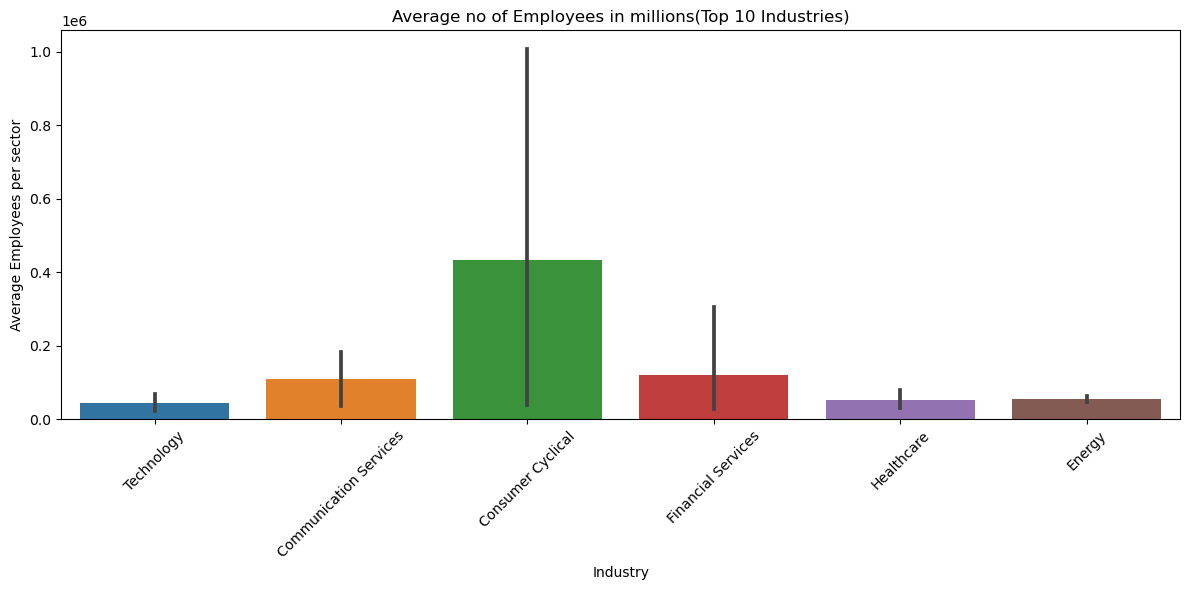

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_data, x='Sector', y='Fulltimeemployees')
plt.xticks(rotation=45)
plt.title('Average no of Employees in millions(Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Average Employees per sector')
plt.tight_layout()
plt.show()

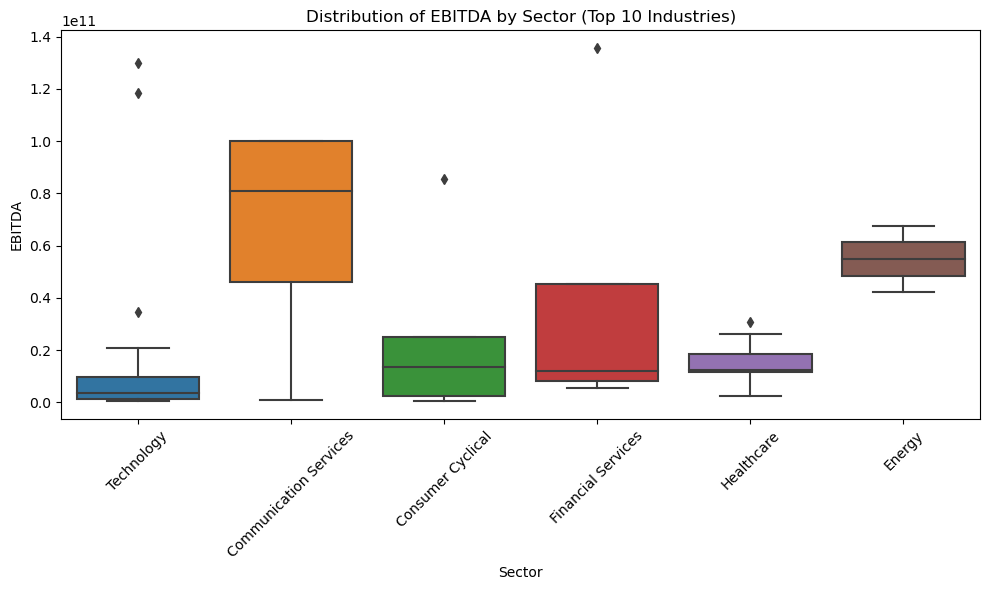

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_industries_data, x='Sector', y='Ebitda')
plt.title('Distribution of EBITDA by Sector (Top 10 Industries)')
plt.xlabel('Sector')
plt.ylabel('EBITDA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

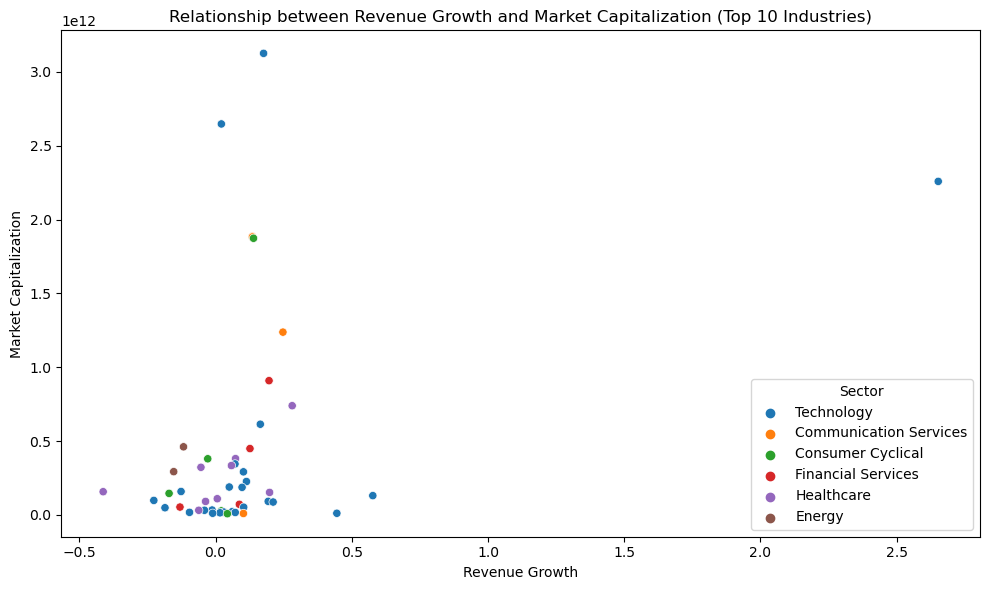

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_industries_data, x='Revenuegrowth', y='Marketcap', hue='Sector')
plt.title('Relationship between Revenue Growth and Market Capitalization (Top 10 Industries)')
plt.xlabel('Revenue Growth')
plt.ylabel('Market Capitalization')
plt.tight_layout()
plt.show()

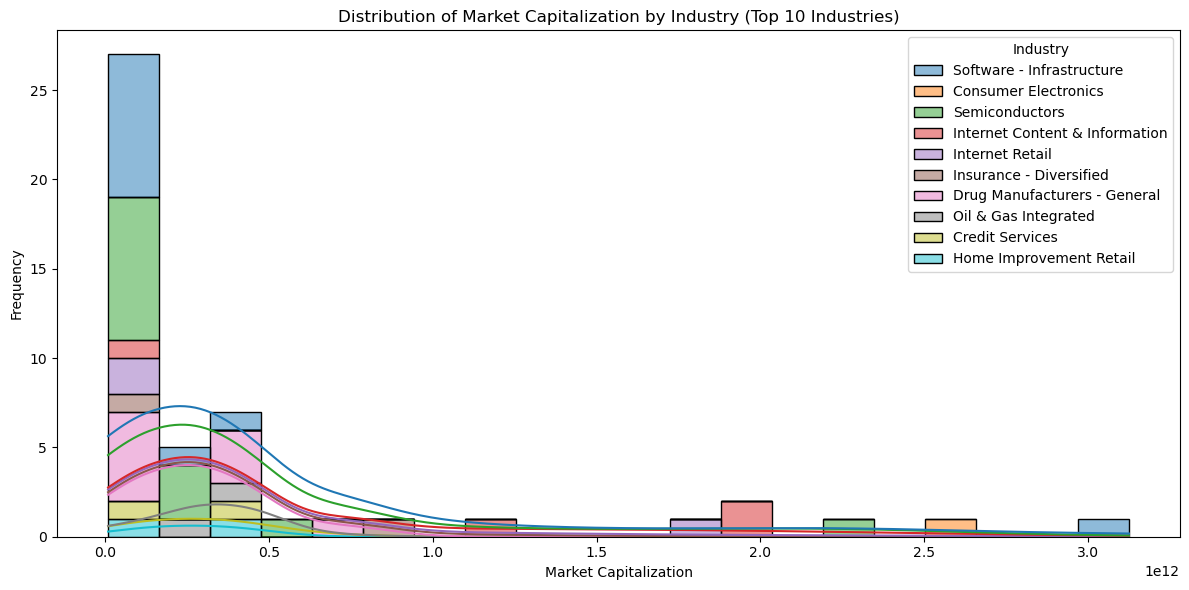

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=top_industries_data, x='Marketcap', hue='Industry', kde=True, multiple='stack', bins=20)
plt.title('Distribution of Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

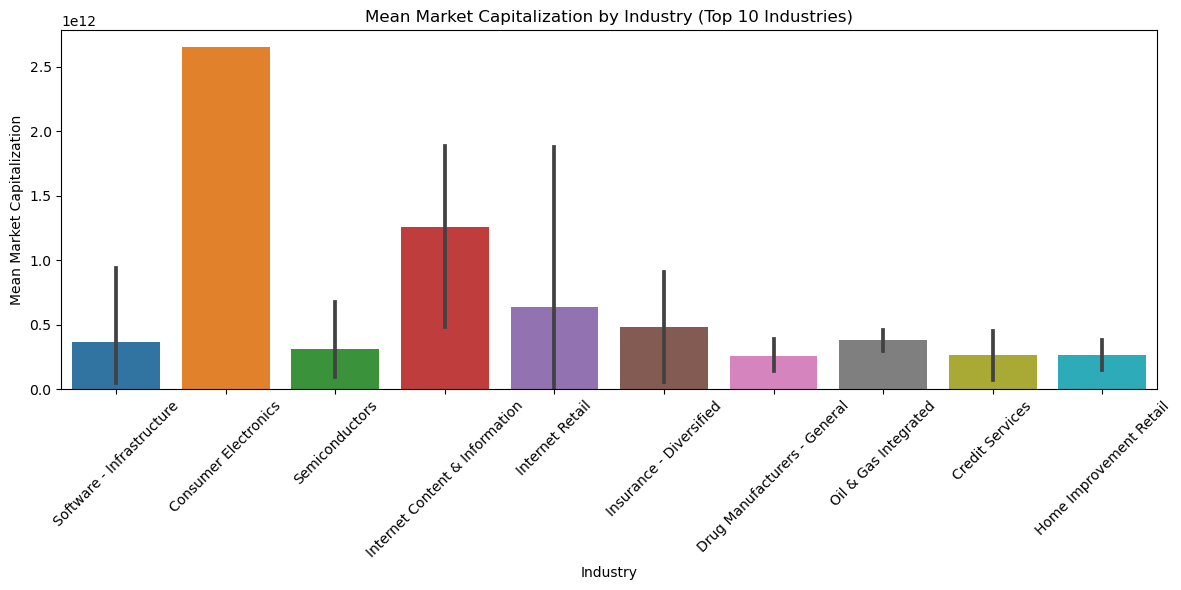

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_data, x='Industry', y='Marketcap')
plt.xticks(rotation=45)
plt.title('Mean Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Mean Market Capitalization')
plt.tight_layout()
plt.show()

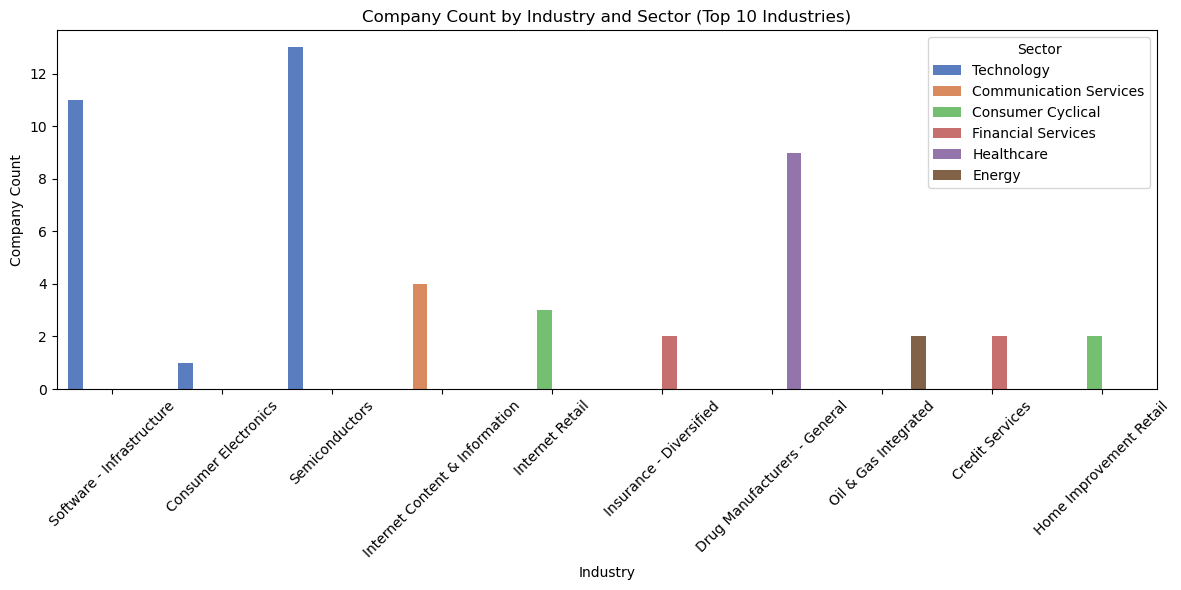

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=top_industries_data, x='Industry', hue='Sector', palette='muted')
plt.title('Company Count by Industry and Sector (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Company Count')
plt.xticks(rotation=45)
plt.legend(title='Sector', loc='upper right')
plt.tight_layout()
plt.show()

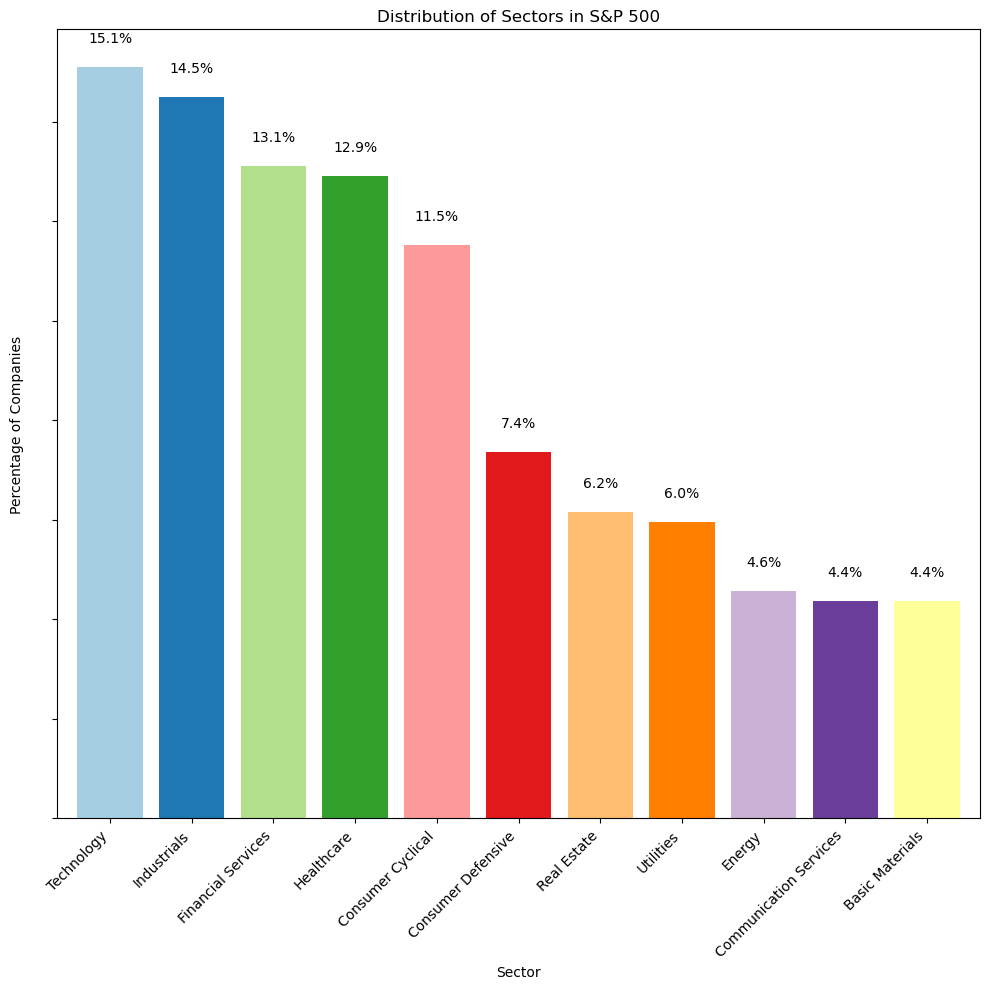

In [19]:
# Load the CSV file containing the constituents of the S&P 500 index
sp500_companies = pd.read_csv('sp500_companies.csv')

# Calculate the distribution of industries in the S&P 500
industry_distribution = sp500_companies['Sector'].value_counts(normalize=True) * 100

# Plotting the distribution of industries
plt.figure(figsize=(10, 10))
industry_distribution.plot(kind='bar', color=plt.cm.Paired(range(len(industry_distribution))), width=0.8)

# Add percentage labels on top of each bar
for i, percentage in enumerate(industry_distribution):
    plt.text(i, percentage + 0.5, f"{percentage:.1f}%", ha='center')

plt.title('Distribution of Sectors in S&P 500')
plt.xlabel('Sector')
plt.ylabel('Percentage of Companies')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


# EDA ON INDEX DATA

In [20]:
stocks = pd.read_csv('sp500_stocks.csv')  #Read Company datsp500_stocks.csv

In [21]:
index = pd.read_csv('sp500_index.csv')  #Import index 

In [22]:
def change_format(file): 
    file['Date']=pd.to_datetime(file['Date'], format='%Y-%m-%d')

In [23]:
change_format(stocks)
change_format(index)

In [24]:
index

,Date,S&P500
0,2014-03-31,1872.34
1,2014-04-01,1885.52
2,2014-04-02,1890.90
3,2014-04-03,1888.77
4,2014-04-04,1865.09
...,...,...
2512,2024-03-22,5234.18
2513,2024-03-25,5218.19
2514,2024-03-26,5203.58
2515,2024-03-27,5248.49


In [25]:
today=datetime.date.today()
year=today.year
month=today.month

In [26]:
index['year']=index['Date'].dt.year 
index['month']=index['Date'].dt.month

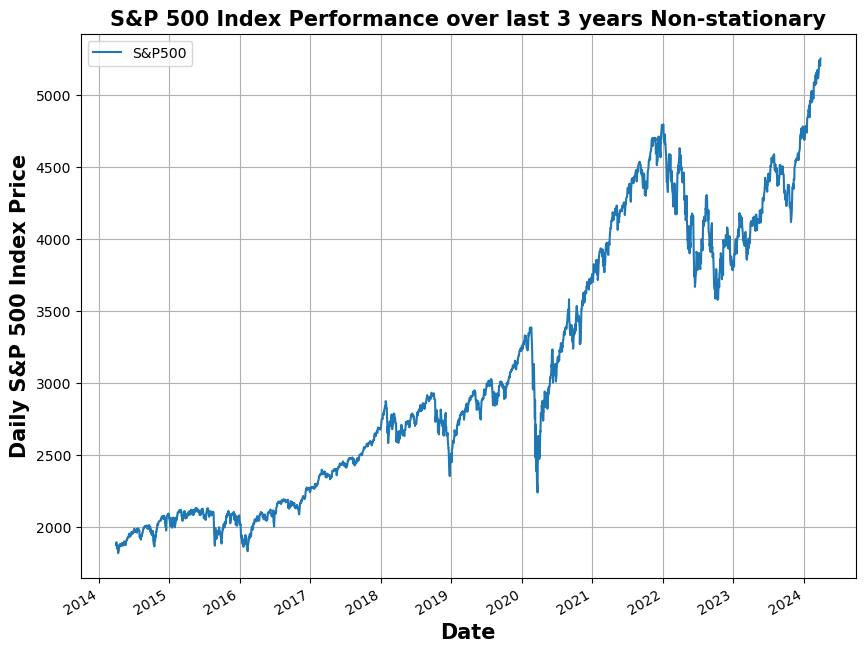

In [27]:
# last 5 years S&P Index performance 
ax=index[index['year']>=year-10][['S&P500','Date']].set_index('Date').plot(figsize=(10,8))
plt.title("S&P 500 Index Performance over last 3 years Non-stationary", weight='bold', fontsize=15)
ax.set_xlabel("Date", weight='bold', fontsize=15)
ax.set_ylabel("Daily S&P 500 Index Price", weight='bold', fontsize=15)
plt.grid(True)
plt.show()

## ARIMA

In [29]:
#necessary Linraries for ARIMA

import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


index = pd.read_csv('sp500_index.csv')  #Import index 
data = index[index['Date'] > '2020-12-31']

#Get the data which is the actual index
df = data['S&P500']
dates = pd.to_datetime(data['Date']) #Convert the dates to time date 



# 3-YEAR DATA IMPLEMENTATION OF ARIMA

### 3-YEAR data of ARIMA (0,1,0)

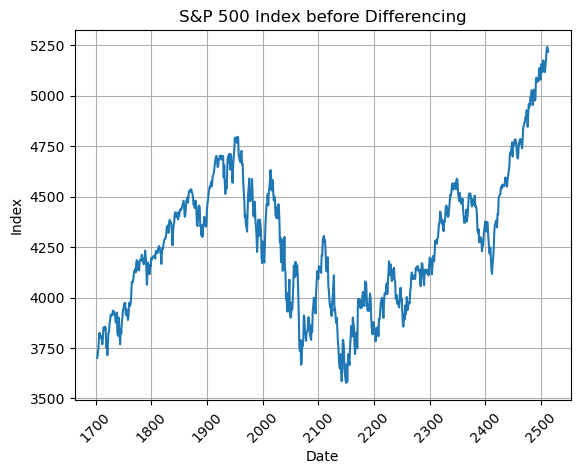

In [30]:
### Split into training and testing

long_data = df  #The three year data

# Number of rows to keep for testing aka the forecasting window. The forecasting window is in days so for testing 1
#month data change the calue to 30 cause there are 30 days in a month
test_size = 3   #For Forecasting window of 3 days, 

# Calculate the index to split the DataFrame
total_rows = len(long_data)

split_index = total_rows - test_size

# Split the DataFrame into training and testing sets where 
train_df = long_data.iloc[:split_index]
test_df = long_data.iloc[split_index:]


#Plot the data before diffrencing
plt.plot(train_df)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('S&P 500 Index before Differencing')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Displaying the plot
#plt.tight_layout()
plt.grid(True)
plt.show()

In [31]:
#ADF test to test whether the data is stationary

adf_test = adfuller(train_df)
print(f'p-value: {adf_test[1]}')

p-value: 0.6579484973753069


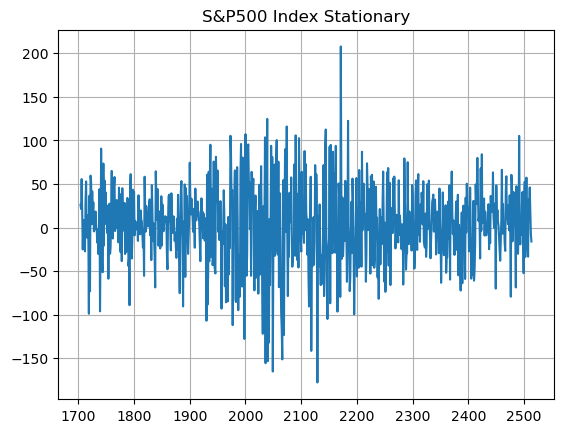

In [32]:
#Difference the data to make it stationary

df_train_diff = train_df.diff().dropna()
plt.title('S&P500 Index Stationary')
df_train_diff.plot()
plt.grid(True)

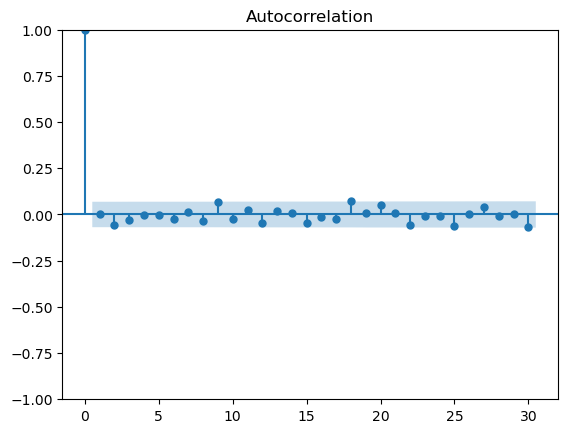

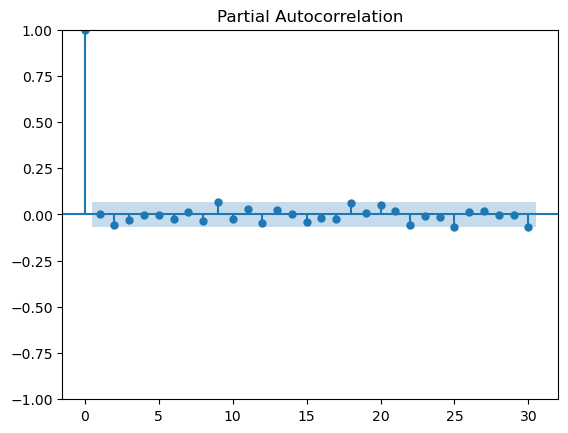

In [33]:
#Plot PACF AND ACF plots of the new differenced data
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)


In [34]:
#ADF Tests to test wheter the data is stationary after differencing once
adf_test = adfuller(df_train_diff)
adf_test
print(f'p-value: {adf_test[1]}')

p-value: 0.0


In [35]:
#For hyperparameter selection, we used the AUTO ARIMA FUNCTION that automatically selects pdand1 for us 
from pmdarima.arima import auto_arima
arima_model = pm.auto_arima(train_df, seasonal=False, stepwise=True)

# Print summary of the fitted model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  811
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4231.939
Date:                Wed, 01 May 2024   AIC                           8465.878
Time:                        20:02:50   BIC                           8470.575
Sample:                             0   HQIC                          8467.682
                                - 811                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2021.0178     78.139     25.864      0.000    1867.869    2174.167
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                69.86
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.25
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:

#Get the predicted values based on the model
forecast_test_auto = arima_model.predict(n_periods=len(test_df))
mae = mean_absolute_error(test_df, forecast_test_auto)
mape = mean_absolute_percentage_error(test_df, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_df, forecast_test_auto))

print(f'MAE for 3 day window: {mae}')
print(f'MAPE for 3 day window: {mape}')
print(f'RMSE for 3 day window: {rmse}')



MAE for 3 day window: 27.02333333333354
MAPE for 3 day window: 0.005154229437658466
RMSE for 3 day window: 28.51366748303964


In [37]:

#Now for the other testing windows
testing_windows = [10,30,90]
for test_size in testing_windows:
    total_rows = len(long_data)
    split_index = total_rows - test_size

    # Split the DataFrame into training and testing sets where 
    train_df = long_data.iloc[:split_index]
    test_df = long_data.iloc[split_index:]
    
    #Fit the ARIMA (0,1,0) parameter
    model = ARIMA(train_df, order=(0,1,0))
    model_fit = model.fit()
    
    #Get the predicted values
    forecast_test = model_fit.forecast(test_size)
    
    #Calculate the error metrics
    mae = mean_absolute_error(test_df, forecast_test)
    mape = mean_absolute_percentage_error(test_df, forecast_test)
    rmse = np.sqrt(mean_squared_error(test_df, forecast_test))
    
    
    if (test_size == 30):
        print('For testing window of 1 month')
    elif (test_size == 90):
        print('For testing window of 3 months')
    else:    
        print(f'For testing window of {test_size} days:')
    
    #
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')
    
    print()
    


For testing window of 10 days:
MAE: 63.40600000000022
MAPE: 0.012131882816288717
RMSE: 71.05872205436884

For testing window of 1 month
MAE: 132.09633333333338
MAPE: 0.025555364030746302
RMSE: 149.70614644473804

For testing window of 3 months
MAE: 371.59644444444467
MAPE: 0.07430906581632268
RMSE: 430.5713725169281



### 3-YEAR Testing of ARIMA (2,1,0)

In [38]:

#Now for the other testing windows
testing_windows = [3,10,30,90]
for test_size in testing_windows:
    total_rows = len(long_data)
    split_index = total_rows - test_size

    # Split the DataFrame into training and testing sets where 
    train_df = long_data.iloc[:split_index]
    test_df = long_data.iloc[split_index:]
    
    #Fit the ARIMA (2,1,0) parameter
    model = ARIMA(train_df, order=(2,1,0))
    model_fit = model.fit()
    
    #Get the predicted values
    forecast_test = model_fit.forecast(test_size)
    
    #Calculate the error metrics
    mae = mean_absolute_error(test_df, forecast_test)
    mape = mean_absolute_percentage_error(test_df, forecast_test)
    rmse = np.sqrt(mean_squared_error(test_df, forecast_test))
    
    
    if (test_size == 30):
        print('For testing window of 1 month')
    elif (test_size == 90):
        print('For testing window of 3 months')
    else:    
        print(f'For testing window of {test_size} days:')
    
    #pRINT THE error metrisc aout
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')
    
    print()
    


For testing window of 3 days:
MAE: 26.367412103163286
MAPE: 0.005029484443122875
RMSE: 27.693555610647703

For testing window of 10 days:
MAE: 62.625150408453194
MAPE: 0.011982971039155119
RMSE: 70.08505260215999

For testing window of 1 month
MAE: 131.0306250040522
MAPE: 0.02534816970052576
RMSE: 148.70758046528425

For testing window of 3 months
MAE: 372.0602128769405
MAPE: 0.07440425975746709
RMSE: 430.97341429993503



# 60-DAY DATA IMPLEMENTATION OF ARIMA

### 60-DAY ARIMA (0,1,2)

In [39]:
short_data = df.tail(60)  #The 60 day Data

In [40]:

#Now for the other testing windows
testing_windows = [3,7,14]
for test_size in testing_windows:
    total_rows = len(short_data)
    split_index = total_rows - test_size

    # Split the DataFrame into training and testing sets where 
    train_df = short_data.iloc[:split_index]
    test_df = short_data.iloc[split_index:]
    
    #Fit the ARIMA (0,1,0) parameter
    arima_model = pm.auto_arima(train_df, seasonal=False, stepwise=True)
    model_fit = model.fit()
    
    #Get the predicted values
    forecast_test_auto = arima_model.predict(n_periods=len(test_df))
    
    #Get the predicted values
    mae = mean_absolute_error(test_df, forecast_test_auto)
    mape = mean_absolute_percentage_error(test_df, forecast_test_auto)
    rmse = np.sqrt(mean_squared_error(test_df, forecast_test_auto))

    
    print(f'For testing window of {test_size} days:')
    
    #pRINT THE error metrisc aout
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')
    
    print()
    


For testing window of 3 days:
MAE: 12.700690401269034
MAPE: 0.002433676433617035
RMSE: 15.933900341504312

For testing window of 7 days:
MAE: 18.859234825106146
MAPE: 0.003609151489831913
RMSE: 23.574083541024674

For testing window of 14 days:
MAE: 31.341683413666228
MAPE: 0.0060577978960073145
RMSE: 38.36258095584661

